# SpMSpM

First, include some libraries

In [1]:
# Run boilerplate code to set up environment

#%run prelude.py
%run prelude.py --no-show-animations

Prelude loaded OK
(Animation display disabled)


## Read matrices


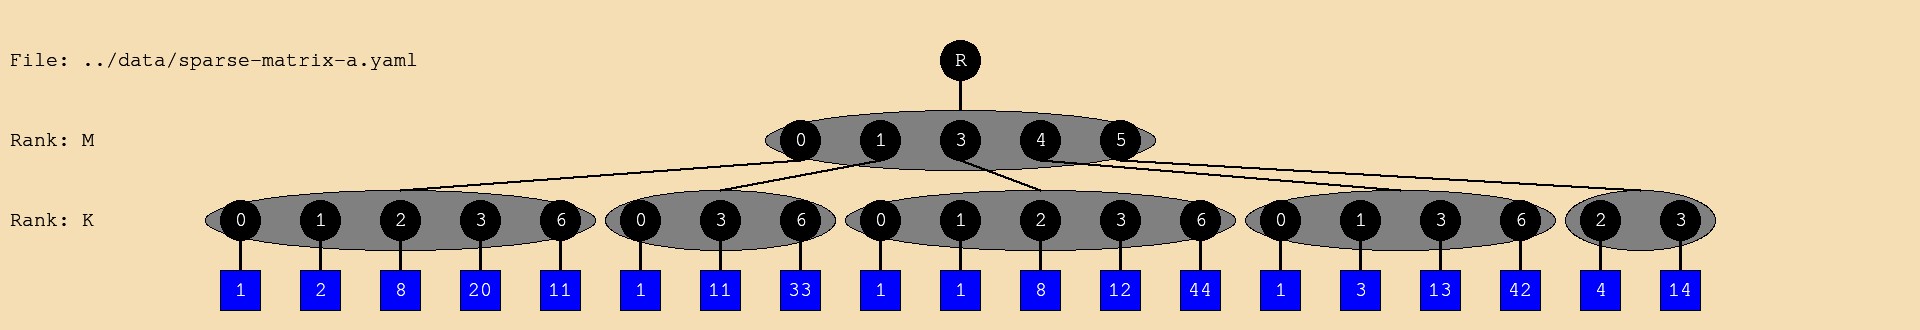

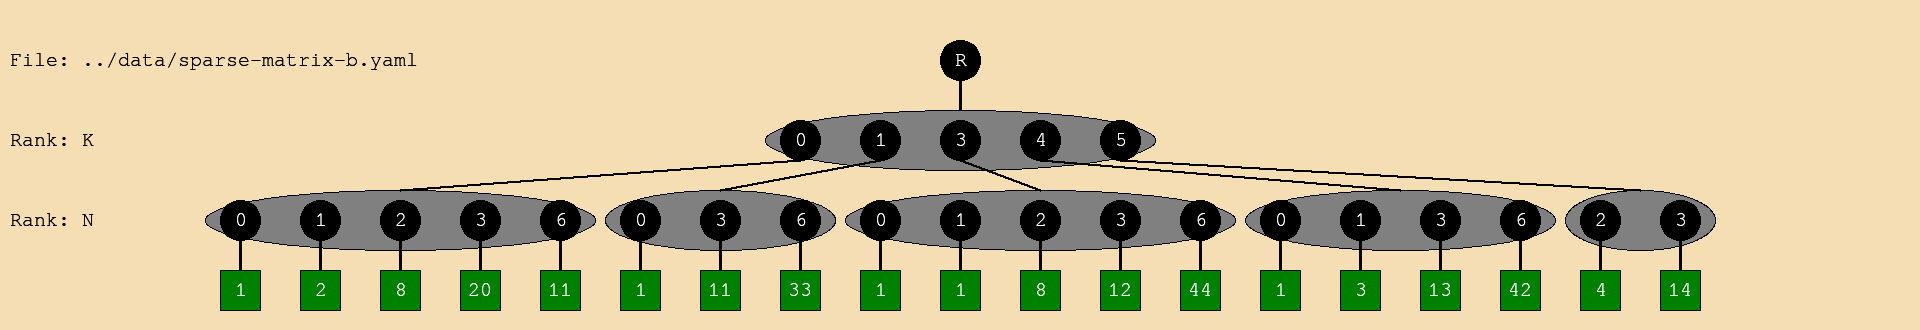

In [2]:
a = Tensor(os.path.join(data_dir, "sparse-matrix-a.yaml"))
b = Tensor(os.path.join(data_dir, "sparse-matrix-b.yaml"))

displayTensor(a.setColor("blue"))
displayTensor(b.setColor("green"))

    
z_verify = Tensor("../data/sparse-matrix-a_times_b.yaml")


## A stationary - column major - matix multipy


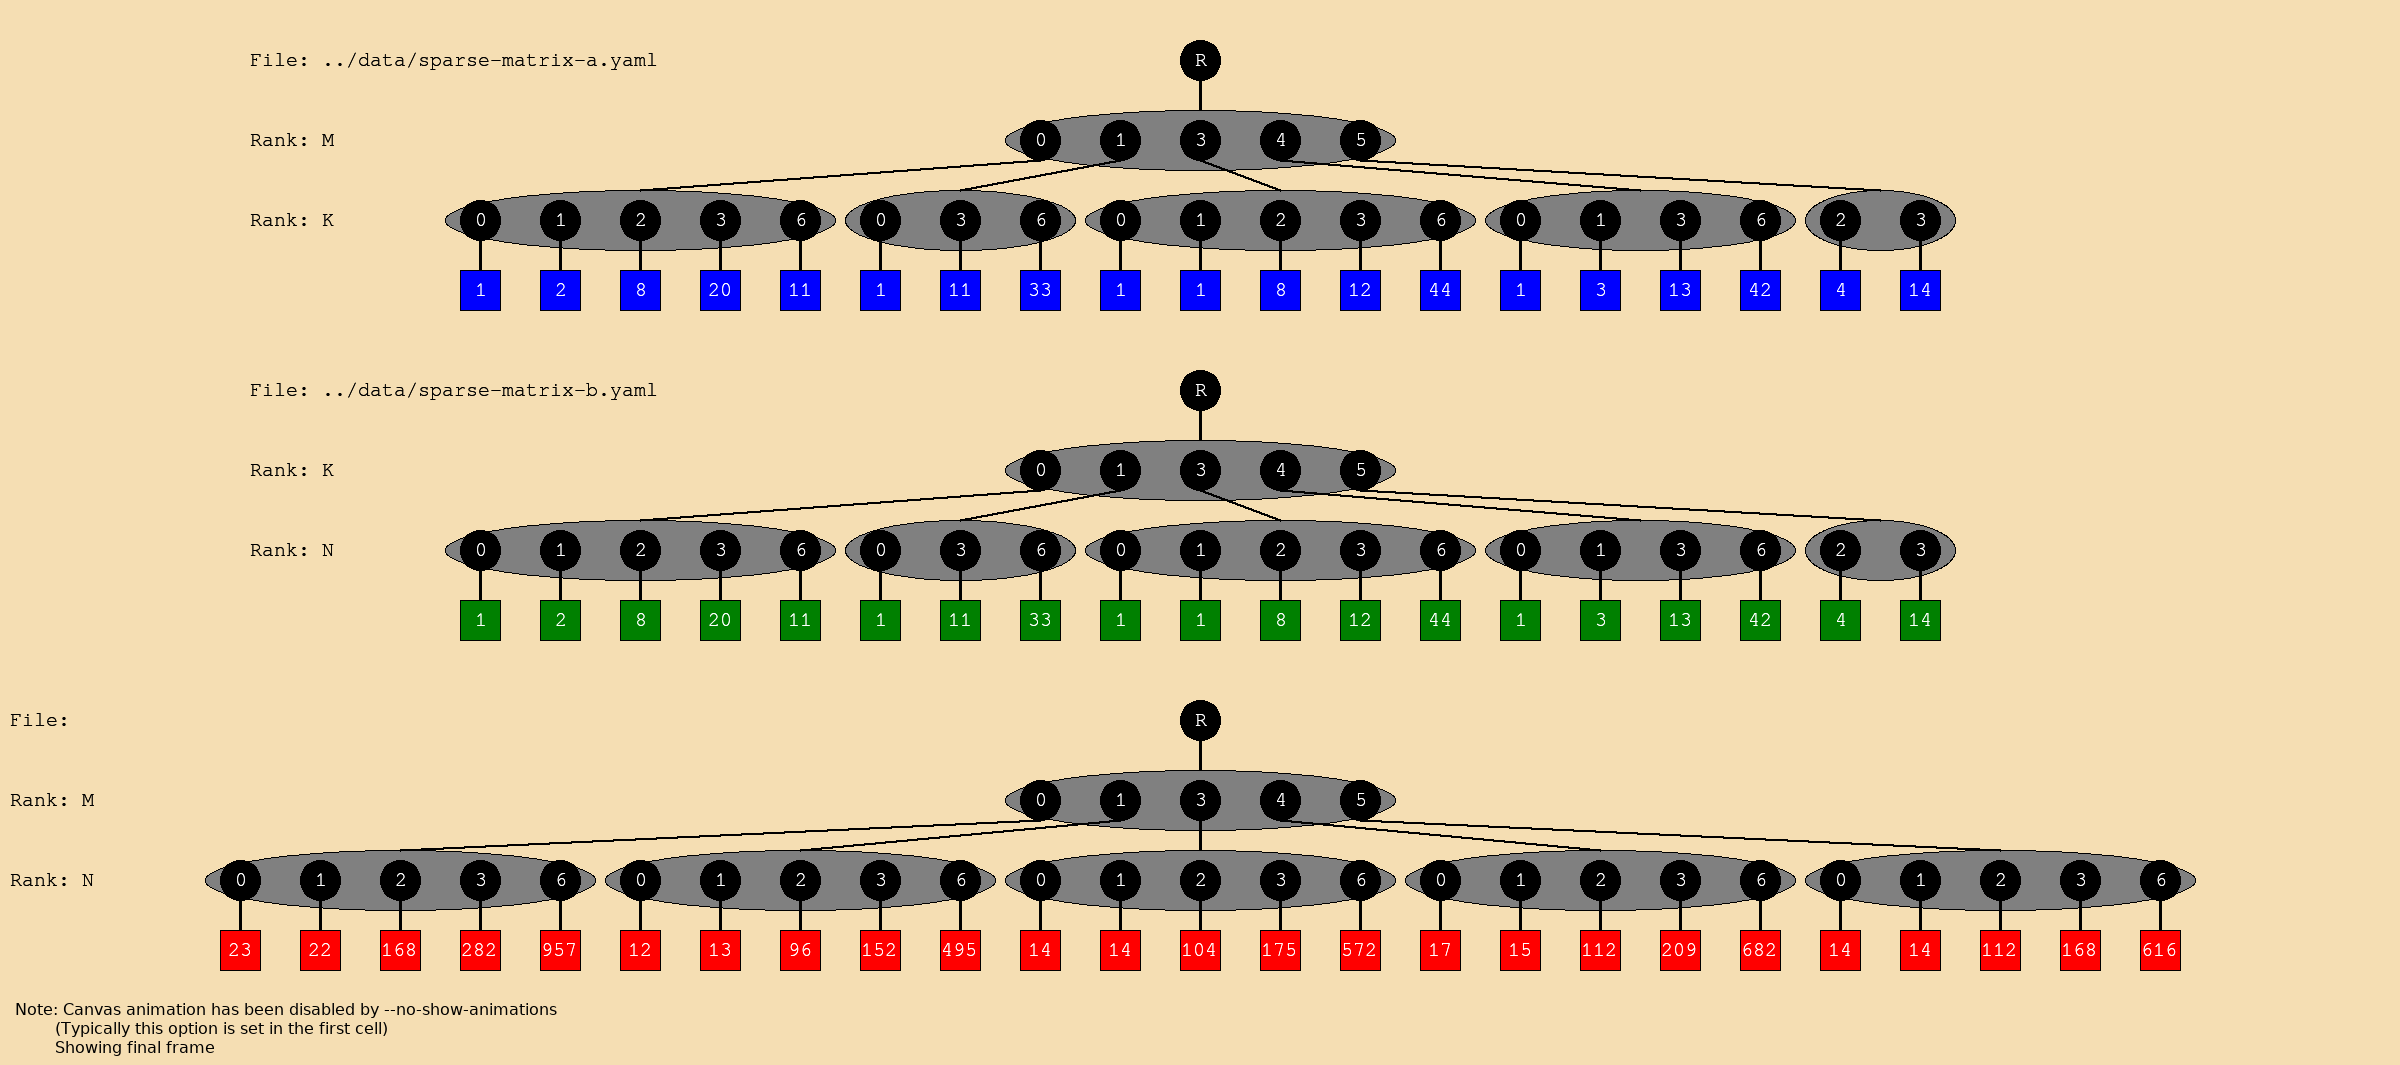

In [3]:
z = Tensor(rank_ids=["M", "N"])

canvas = TensorCanvas(a, b, z)

a_m = a.getRoot()
b_k = b.getRoot()
z_m = z.getRoot()

#print("Processing z_m << a_m -> m, (z_n_ref, a_k)")
for m, (z_n_ref, a_k) in z_m << a_m:
    #print(f"    {m}, ({z_n_ref}, {a_k})")
    
    #print("    Processing a_k & b_k -> k, (a_val, b_n)")
    for k, (a_val, b_n) in  a_k & b_k:
        #print(f"        {k}, ({a_val}, {b_n})")

        #print("        Processing z_n_ref << b_n -> n, (z_ref, b_val)")
        for n, (z_ref, (b_val)) in z_n_ref << b_n:
            #print(f"            {m}, ({z_ref}, {b_val})")
            z_ref += a_val * b_val
            canvas.addFrame((m, k), (k, n), (m, n))

displayCanvas(canvas)

## Check result

In [4]:
z_verify == z

True

## A stationary - column major - matix multipy - reversed


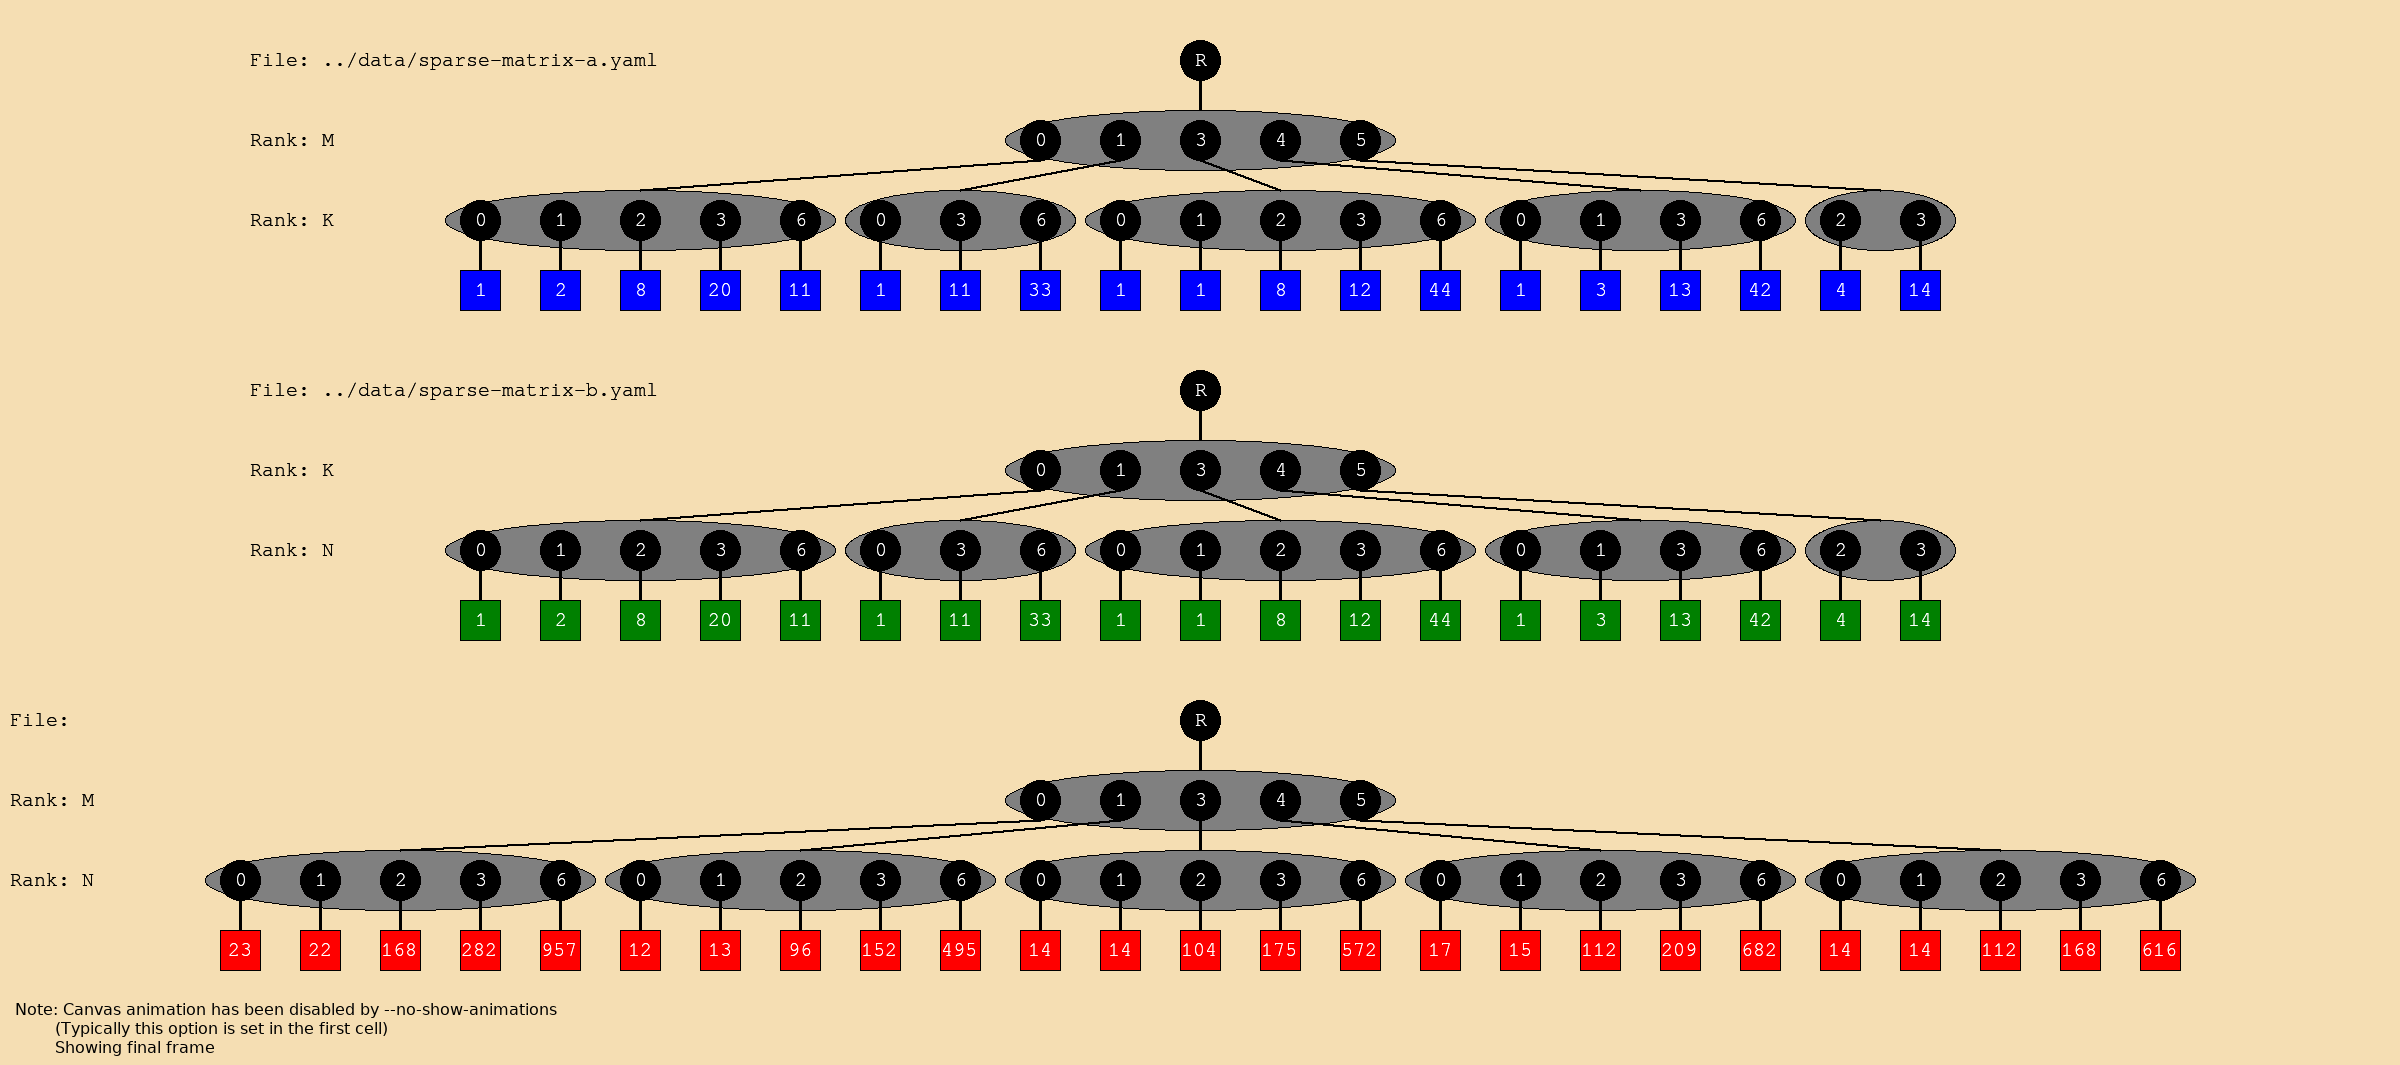

In [5]:
z = Tensor(rank_ids=["M", "N"])

a_m = a.getRoot()
b_k = b.getRoot()
z_m = z.getRoot()

canvas = TensorCanvas(a, b, z)


#print("Processing z_m << a_m -> m, (z_n_ref, a_k)")
for m, (z_n_ref, a_k) in reversed(z_m << a_m):
    #print(f"    {m}, ({z_n_ref}, {a_k})")
    
    #print("    Processing a_k & b_k -> k, (a_val, b_n)")
    for k, (a_val, b_n) in  reversed(a_k & b_k):
        #print(f"        {k}, ({a_val}, {b_n})")

        #print("        Processing z_n_ref << b_n -> n, (z_ref, b_val)")
        for n, (z_ref, (b_val)) in reversed(z_n_ref << b_n):
            #print(f"            {n}, ({z_ref}, {b_val})")
            z_ref += a_val * b_val
            canvas.addFrame((m, k), (k, n), (m, n))

displayCanvas(canvas)


## Check result

In [6]:
z_verify == z

True

## Testing area

For running alternative algorithms